## Number of Fundings

#### Problem Statement :

- Check the trend of investments over the years. To check the trend, find - Total number of fundings done in each year. 
- Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis. 
- Print year-wise total number of fundings also print years in ascending order.

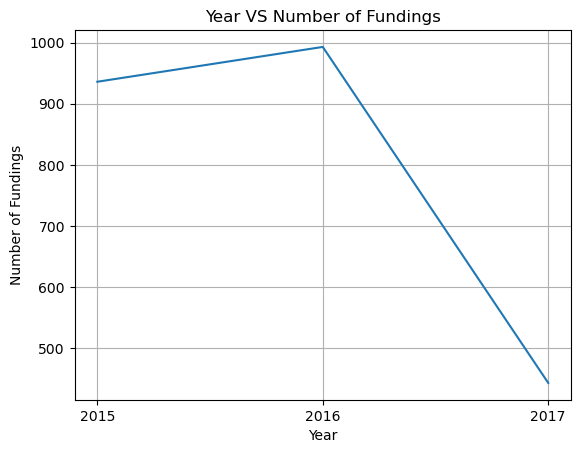

2015 936
2016 993
2017 443


In [28]:
import csv
import collections
import matplotlib.pyplot as plt

with open ('startup_funding (1).csv', encoding ='UTF-8') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace = True)
    
    dct = {}
    
    for row in file_data:
        
        year = row['Date'][-4:]
        
        if year != '/015':
            if year in dct:
                dct[year] += 1
            else:
                dct[year] = 1
        
    
    ord_dct = collections.OrderedDict(sorted(dct.items()))
    
    x = list(ord_dct.keys())
    y = list(ord_dct.values())
    
    plt.plot(x,y)
    plt.grid()
    plt.xlabel('Year')
    plt.ylabel('Number of Fundings')
    plt.title('Year VS Number of Fundings')
    plt.show()  
    
    
    for row in ord_dct:
        print(row,ord_dct[row])

## Top Indian Cities

#### Problem Statement :

- Find out which cities are generally chosen for starting a startup. 
- Find top 10 Indian cities which have most number of startups ?
- Plot a pie chart and visualise it.
- Print the city name and number of startups in that city also.

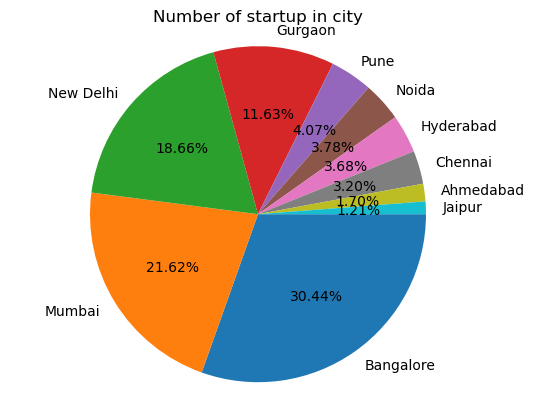

Bangalore 628
Mumbai 446
New Delhi 385
Gurgaon 240
Pune 84
Noida 78
Hyderabad 76
Chennai 66
Ahmedabad 35
Jaipur 25


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


df = pd.read_csv('startup_funding (1).csv',encoding = 'UTF-8')

#df.head()
#df.isnull().sum()

df.dropna(subset = ['CityLocation'], inplace = True)

#df.isnull().sum()

df[df['CityLocation']=='bangalore'] = 'Bangalore'
df[df['CityLocation']=='Delhi'] = 'New Delhi'


city = df['CityLocation'].value_counts()[:10]
city_name = city.index
startups = city.values

plt.pie(startups, labels=city_name, autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.show()

for i in range(len(city)):
    print(city.index[i], city.values[i])

## Funding amount

#### Problem Statement :

- Find out if cities play any role in receiving funding.
- Find top 5 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top   5 Indian cities only).
- Print the top 5 city.

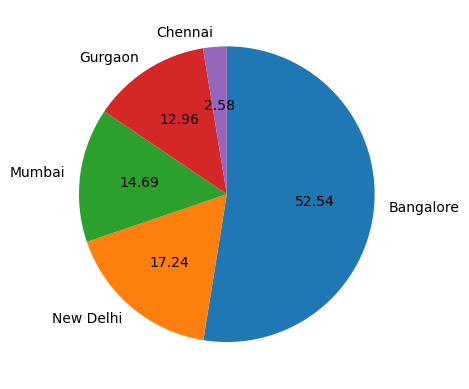

Bangalore
New Delhi
Mumbai
Gurgaon
Chennai


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('startup_funding (1).csv', encoding = 'UTF-8')

#df.head()
#df.isnull().sum()

df.dropna(subset = ['CityLocation'], inplace = True)
#df.isnull().sum()

df.CityLocation.replace('Delhi','New Delhi', inplace = True)
df.CityLocation.replace('bangalore','Bangalore', inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:5]
city = df.index
amount = df.values

plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,startangle=90)
plt.show()

for row in city:
    print(row)

## Investment Type

#### Problem Statement :
- There are 4 different type of investments.Plot a bar chart for each investment type.
- Print the investment type .

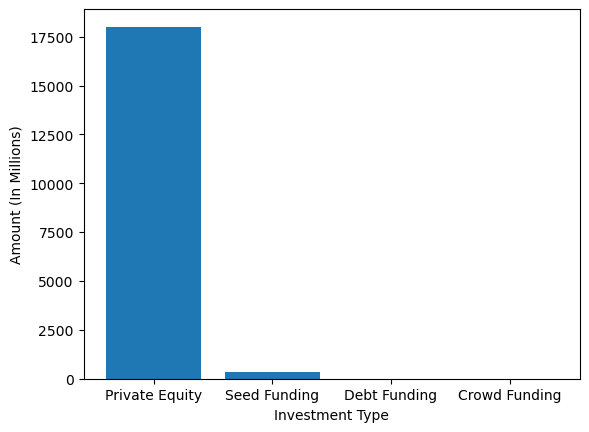

Private Equity 18007085000.0
Seed Funding 332345708.0
Debt Funding 7800000.0
Crowd Funding 155768.0


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding (1).csv', encoding='UTF-8')

#df.head()
#df.isnull().sum()


df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace = True)
df['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)

investment = df.index
amount = df.values

plt.bar(investment,amount/1000000)
plt.xlabel('Investment Type')
plt.ylabel('Amount (In Millions)')
plt.show()

for i in range(len(df)):
    print(df.index[i], df.values[i])

## Top Industries

#### Problem Statement :
- Which type of companies got more easily funding. To answer this question, find -Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

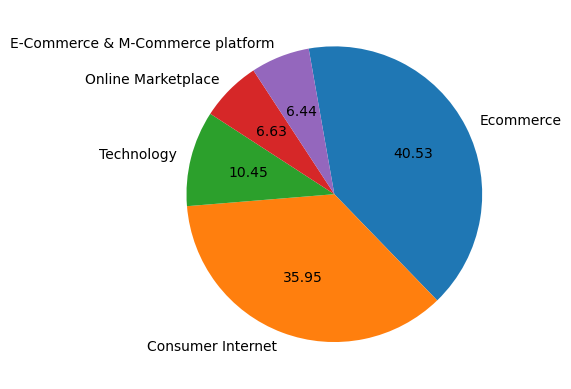

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding (1).csv',encoding = 'utf-8')

df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]

industry = df.index
amount = df.values

plt.pie(amount,labels = industry,autopct='%0.2f',counterclock=False,startangle=100)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],round(percent[i],2))

## Top startups

#### Problem Statement :
- Find top 5 startups with most amount of total funding.
- Print the startup name in descending order with respect to amount of funding.

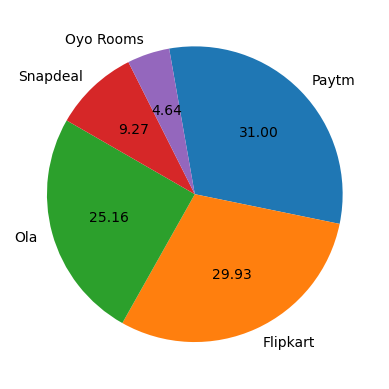

Paytm 2340000000.0
Flipkart 2259700000.0
Ola 1899500000.0
Snapdeal 700000000.0
Oyo Rooms 350000000.0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding (1).csv',encoding = 'utf-8')

df['StartupName'].replace('Flipkart.com','Flipkart' , inplace= True)
df['StartupName'].replace('Ola Cabs','Ola' , inplace= True)
df['StartupName'].replace('Olacabs','Ola' , inplace= True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()

df = df.sort_values(ascending = False)[:5]
industry = df.index
amount = df.values

plt.pie(amount,labels = industry,autopct='%0.2f',counterclock=False,startangle=100)
plt.show()


for i in range(len(df)):
    print(industry[i], amount[i])

## Funding rounds

#### Problem Statement :

- Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
- Print the startup name in descending order with respect to the number of funding round as integer value.

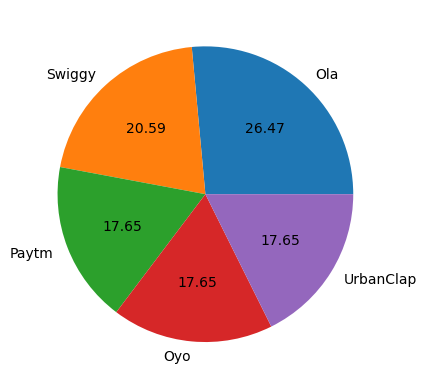

Ola 9
Swiggy 7
Paytm 6
Oyo 6
UrbanClap 6


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('startup_funding (1).csv' , encoding = 'UTF-8')

#df.head()
#df.isnull().sum()

df.dropna(subset= ['InvestorsName'], inplace = True)

#df.isnull().sum()

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values


plt.pie(count, labels=startupname, autopct = '%0.2f')
plt.show()


for i in range(len(totalfunding)):
    print(totalfunding.index[i], totalfunding.values[i] )

## Top Investor

#### Problem Statement :
- Find the Investors who have invested maximum number of times.
- Print the investor name and number of times invested as integer value.


Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


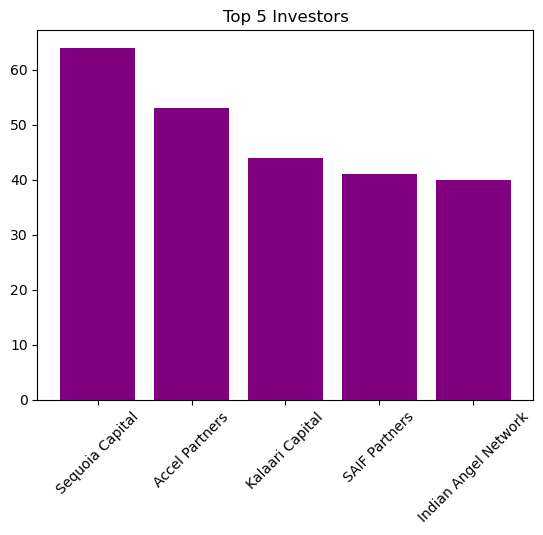

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding (1).csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName'])
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

investors = df.InvestorsName
investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
            
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1

dct_keys = sorted(dct,key=dct.get,reverse=True)
c=0
Inv_name=[]
count=[]
for i in range(len(dct_keys)):
    print(dct_keys[i],dct[dct_keys[i]])
    Inv_name.append(dct_keys[i])
    count.append(dct[dct_keys[i]])
    c+=1
    if c==5:
        break

plt.bar(Inv_name,count,color='Purple')
plt.title('Top 5 Investors')
plt.xticks(rotation=45)
plt.show()